# Rising Up in the Air - Experimenting with Radio Balloons

## By Ingo Dahn (dahn@dahn-research.eu)

Weather balloons are a simple, but important mean to explore the atmosphere. They carry radiosondes high up in the air (how high?) These radiosondes measure several parameters of the atmosphere during their flight, for instance air temeperature and air pressure. Weather balloons collect many data. With a good understanding of athmospheric phenomena we should be able to predict these data to a certain extent. Can you do it?

This notebook lets you perform your own experiments with real weather balloons.  We start with a simple method for calculating the air temperature in various height and check it against the measurements of a real weather balloon. And you can repeat this experiment yourself with many ballon risings! Can you come up with a better model?

This notebook contains text cells, explaining what we do, and code cells which perform calculations. 

Don't worry, if you don't understand the content of the code cells! You can and should change the code in these cells in the specified places in order to perform your own live experiments with real weather data. We start simple and so you don't need to know a lot of Math, Physics or Programming - just go.

***License:*** This document is made available under a <a href="http://creativecommons.org/licenses/by-sa/4.0/" target="_blank">Creative Commons Attribution Share Alike License 4.0</a>.

## Cool

People climbing mountains early noted that the air gets colder as they climb up. Based on measurements with thermometers scientists carried uphill, scientist calculated that the air temperature $t(x)$ decreases by 6.5°C if height is increased by 1000 m (a so-called <a href="https://en.wikipedia.org/wiki/Lapse_rate" target="_blank">Lapse Rate</a>) .
$T(x+1000)=T(x)-6.5$

Let's assume a temperature of 15°C on the ground (we may change that later): $T(0)=15$. What would be the temeperature at a height of 7500 m according to this model?

Let's do a bit of calculation. We assume the most simple model - a linear decrease of temperature: $T(x)=cx+t_0$ and we need to determine $c$ and $t_0$. Determining $t_0$ is easy, as $t_0=T(0)=15$. $T(x+1000)=c(x+1000)+t_0, T(x)=cx+t_0$, hence $-6.5=T(x+1000)-T(x)=1000 c$ and therefore $c=\frac{-6.5}{1000}=-0.0065$ and $T(x)=-0.0065 x+15$:

In [1]:
t_0=15
c=-6.5/1000
T(x)=c*x+t_0
T(7500)

-33.7500000000000

The temperature at a height of 7500 m is, according to our model. -33.75°C.

***Modify the cell above to calculate the temperature at 9200 m by replacing in line 4 `7500` with `9200`!*** Depending upon the context where you read this, you need to select `Run` from the Cell menu or press `Shift+Return` or click the _Execute_ button to evaluate the cell for the new height. ***Play around and calculate the expected air temperature at various height; vary also the ground temperature `t_0`!***

## Really Cool

In order to test this simple model, let's go to the <a href="https://www.google.com/search?q=idar-oberstein+wetterstation+besuch+ballon&sxsrf=ALeKk02WICzDMzR0sctIywKHjFKrW0cGJQ:1602267438608&tbm=isch&source=iu&ictx=1&fir=N-s0936pCOB0VM%252C2e6pOxJmOEdb9M%252C_&vet=1&usg=AI4_-kSfMxtAIFDx-UIPewtSNOYxI63EQA&sa=X&ved=2ahUKEwjcjo2sj6jsAhXIGuwKHXtrACMQ9QF6BAgKEAY&biw=1563&bih=1055#imgrc=N-s0936pCOB0VM" target="_blank">weather station in Idar-Oberstein/Germany</a> which is <a href="https://goo.gl/maps/kw5grnfxkv3Y8dYL7" target="_blank">located</a> at a height of 376 m.

The following cell initializes our calculations. It must be evaluated before the following cells which load the data from the balloon. If in line 2 `randomBalloon=False` it uses a specific sample balloon flight which is discussed in the comments. You may change it to `randomBalloon=True` in order to select data from a randomly selected balloon flight from the Idar-Oberstein weather station.

In [1]:
# Change the value of randomBalloon to True in order to select a flight by chance
randomBalloon=False
import pandas as pd
remoteLoaded=False
print("System initialized")

System initialized


Now we can load our data.

In [2]:
if randomBalloon:
    if not remoteLoaded:
        print("Loading data from German Weather Service. Please, be patient.")
        url="https://opendata.dwd.de/climate_environment/CDC/observations_germany/radiosondes/low_resolution/recent/punktwerte_aero_02385_akt.zip"
        dataVRemote=pd.read_csv(url,';').values
        flights=len(set([d[1] for d in dataVRemote]))
        remoteLoaded=True
        print(len(dataVRemote),"data points from",flights,"flights loaded.")
    r=ZZ.random_element(0,len(dataVRemote)-1)
    date=dataVRemote[r][1]
    dataV=[p for p in dataVRemote if p[1]==date]
else:
    url="https://dahn-research.eu/MathTrek/RisingUp/sampleIO02385.zip"
    dataV=pd.read_csv(url,';').values
    remoteLoaded=False
date=str(dataV[0][1])
print("Ready to analyze",len(dataV),"data points from one flight on",date[6:8]+"."+date[4:6]+"."+date[0:4]+".")

Ready to analyze 130 data points from one flight on 30.09.2020.


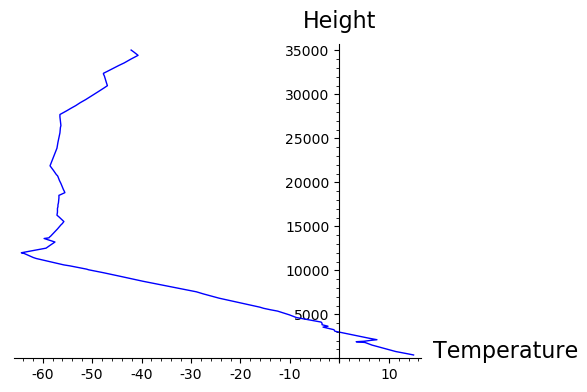

In [3]:
temp=[(dataV[n][11],dataV[n][4]) for n in range(0,len(dataV)) if (dataV[n][11]> -999)]
balloonPlot=list_plot(temp,plotjoined=True,axes_labels=['Temperature','Height'])
balloonPlot

We observe, that the development of air temperature with height on this day has three phases.
* Up to 4000 m the air temperature behaves somewhat irregularly
* in the range between 4000 m and 12000 m it decreases linearly - the curve is almost a straight line 
* it increases and oscillates again above 12000 m

Let's call the upper region of oscillating temeperature - here above 12000 m - ***Tropopause*** and the region below it ***Troposphere***.


In [4]:
# Adapt these two values to the minimum and maximum height of the region of linear temperature decrease if you are not using the default flight
linMin=4000
linMax=12000
show("Range of presumed linear temperature descent defined.")

'Range of presumed linear temperature descent defined.'

Clearly, our simple linear model does not work in the Tropopause, but perhaps it works in the Troposphere? Let's check!

As we don't have the value at height 0, we have to redefine our model function $T(x)=cx+t_0$. 

When we know that $T(h)=t_h$, then $T(h+1000)-T(h)=c\cdot 1000 = -6.5$ and hence we still have $c=-0.0065$. But now we have $T(h)=c\cdot h + t_0 = t_h$ and hence $t_0 = t_h -c\cdot h$. 

We also cannot expect our simple linear model to work below 4000 m, where the distribution of temperature isn't linear. 


In [6]:
h=0; t_h=0
i=0
while temp[i][1] < linMin:
    i+=1
t_h=temp[i][0]; h=temp[i][1]
show("The first data point above %i m is at a height of %i m with air temperature of %f°C."%(linMin,h,t_h))

'The first data point above 4000 m is at a height of 4119 m with air temperature of -3.700000°C.'

Let's calculate $t_0$ as described above.

In [7]:
c=-0.0065
t_0 = t_h-c*h
show(LatexExpr("t_0 = "),t_0)
show(LatexExpr("T(x) = "),c,LatexExpr("\\cdot x +"),t_0)

t_0 =  23.0735000000000

T(x) =  -0.00650000000000000 \cdot x + 23.0735000000000

So we get our function $T(x)=-0.0065 x + 23.0735$. 

Let's compare this with the data from our balloon.

Our diagram uses temperature on the abscissae and the height on the ordinates, so, to compare both, we need to draw the inverse function of $T$, $T_{inv}(t)=\frac{t-t_0}{c}$.

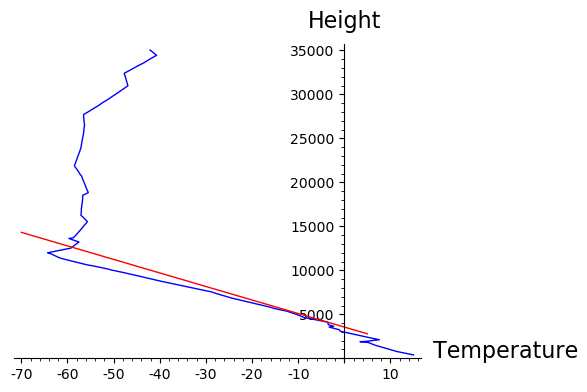

In [8]:
T_inv(x)=(x-t_0)/c
show(balloonPlot+plot(T_inv,-70,5,color='red'))

That's not a very good match! The simple linear model predicts a more strong decrease of temperature than shown by the measurement. Well, that may be due to particular conditions at this day at this place and we need to analyse more balloon reports. At least, the adequate constant $c$ may vary from day to day - but by how much?

In order to get an indication for that, we may try to find a linear function that provides the best fit to the data between 4000 m and 11000 m.This can be achieved by a mathematical method called <a href="https://en.wikipedia.org/wiki/Linear_regression" target="_blank">Linear Regression</a>.

-126.25666221248792*x + 3721.6288391232924

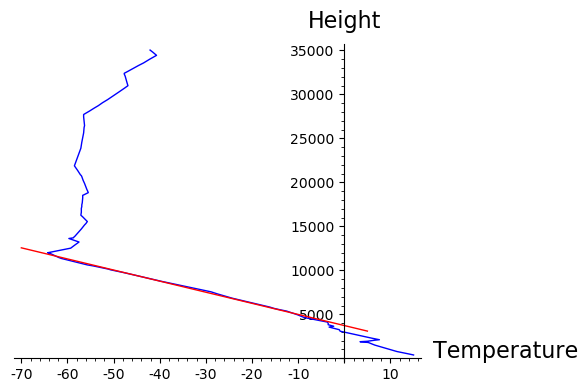

In [9]:
dataLin0=[p for p in temp if p[1] > linMin]
dataLin=[p for p in dataLin0 if p[1]< linMax]
var('a,b,x')
f_lin(x)=a*x+b
q=find_fit(dataLin, f_lin, solution_dict = True)
aLin=q[a];bLin=q[b]
show(f_lin(a=aLin,b=bLin))
show(balloonPlot+plot(f_lin(a=aLin,b=bLin),-70,5,color='red'))

That fits much better than the original model. To compare it, we have to calculate the invers function of our new linear function.

In [10]:
show((1/aLin)*x-(bLin/aLin))

-0.007920374121066309*x + 29.47669274560618

We see, that in fact the air temperature decreases by 7.9°C every 1000 m!

## Summary

We have started with the hypothesis that the air temperature decreases by 6.5°C when the height increases by 1000 m. This has led us to establish a linear model for the development of air temperature. 

Looking at the data from one radio balloon flight suggests that the development of air temperature follows different laws in the lower and in the upper part of the atmosphere travelled by the balloon, providing indications for at least three layers of the atmosphere. In the upper and in the lower layer, not even the linear form of our model is adequate, while in the middle layer a linear model fits well, but we have to adjust the cofficients of our model to make it fit to the data.

***Criticism:*** Climate data can depend upon many factors, e.g. geographic location and season of the year. In order to evaluate our claims, they need to be checked against many weather balloon data. Only then may we have a chance to understand the various factors influencing and changing our climate.

***To Do:*** Look for answers to the following questions.
* Can these claims be confirmed by other balloon flights? You can try this by modifying the second code cell above to load the data from a random balloon flight from the Idar-Oberstein weather station.
* How do the coefficients of the model vary between different flights? What might be values for the coefficients of the linear model that provide an optimal fit for all flights?
* How does the season of the year and the time of day, with their different intensity of sun light, influence the development of the air temperature? This notebook has all the data required, but answering the question will require some programming.
* How may other properties of the athmosphere depend upon each other? For instance, how does pressure depend upon height? How does temperature depend on pressure? (Note: pressure at a data point `p` is `p[3]`. This requires some adaptation of the code in this notebook.
* Which model may describe the oscillation of temperature in the Tropopause? How can these be explained?